In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Utils import Processing
from Models import ANN_1, ConvMassimo

from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

importlib.reload(Processing)
importlib.reload(ANN_1)

2023-10-01 15:53:11.850601: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 15:53:11.881569: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-01 15:53:11.881601: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-01 15:53:11.881624: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-01 15:53:11.887627: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 15:53:11.888438: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

<module 'Models.ANN_1' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Models/ANN_1.py'>

In [2]:
class_weight=Processing.class_weights()
class_weight

{'ModerateDemented': 1.0,
 'VeryMildDemented': 0.008885850991114148,
 'MildDemented': 0.05329445078399054,
 'NonDemented': 0.0}

In [3]:
X_train = np.load('PCA_Data/X_train_pca.npy')
y_train = np.load('PCA_Data/y_train.npy')
labels_train = np.load('PCA_Data/labels_list_train.npy')

X_test = np.load('PCA_Data/X_test_pca.npy')
y_test = np.load('PCA_Data/y_test.npy')
labels_test = np.load('PCA_Data/labels_list_test.npy')

In [4]:
np.unique(labels_train, return_counts=True)

(array(['MildDemented', 'ModerateDemented', 'NonDemented',
        'VeryMildDemented'], dtype='<U16'),
 array([ 717,   52, 2560, 1792]))

In [5]:
np.unique(labels_test, return_counts=True)

(array(['MildDemented', 'ModerateDemented', 'NonDemented',
        'VeryMildDemented'], dtype='<U16'),
 array([179,  12, 640, 448]))

In [6]:
y_train = y_train ** 0.1
y_train

array([[0.74587869],
       [0.62354802],
       [0.62354802],
       ...,
       [0.62354802],
       [0.62354802],
       [0.74587869]])

In [7]:
#df_label_weight = pd.DataFrame(labels_train)
#df_label_weight

In [8]:
# normalize with min-max normalization using sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [9]:
# X_train = X_train.reshape(-1, 27, 27)
# X_test = X_test.reshape(-1, 27, 27)
# normalize each image with min-max normalization
#for i in range(len(X_train)):
#    max = X_train[i].max()
#    min = X_train[i].min()
#    X_train[i] = (X_train[i] - min) / (max - min)
#
#for i in range(len(X_test)):
#    max = X_test[i].max()
#    min = X_test[i].min()
#    X_test[i] = (X_test[i] - min) / (max - min)

In [10]:
validation_percentage = 0.5
X_val = X_train[int(1-validation_percentage * len(X_train)):]
X_train = X_train[:int(1-validation_percentage * len(X_train))]
y_val = y_train[int(1-validation_percentage * len(y_train)):]
y_train = y_train[:int(1-validation_percentage * len(y_train))]
labels_val = labels_train[int(1-validation_percentage * len(labels_train)):]
labels_train = labels_train[:int(1-validation_percentage * len(labels_train))]

In [11]:
# # one hot encoding df_labels_
# df_labels_train = pd.DataFrame(labels_train, columns=['label'])
# df_labels_train = pd.get_dummies(df_labels_train['label'])
# df_labels_train = df_labels_train.astype(int)
# df_labels_train = df_labels_train[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]
# 
# df_labels_val = pd.DataFrame(labels_val, columns=['label'])
# df_labels_val = pd.get_dummies(df_labels_val['label'])
# df_labels_val = df_labels_val.astype(int)
# df_labels_val = df_labels_val[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]
# 
# df_labels_test = pd.DataFrame(labels_test, columns=['label'])
# df_labels_test = pd.get_dummies(df_labels_test['label'])
# df_labels_test = df_labels_test.astype(int)
# df_labels_test = df_labels_test[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]

In [12]:
df_train = pd.DataFrame(X_train)
df_val = pd.DataFrame(X_val)
df_test = pd.DataFrame(X_test)

In [13]:
df_train_scaled = pd.DataFrame(scaler.transform(df_train))
df_val_scaled = pd.DataFrame(scaler.transform(df_val))
df_test_scaled = pd.DataFrame(scaler.transform(df_test))

In [14]:
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,-0.679516,0.009893,-0.772439,0.399707,1.147609,-0.258136,-0.179097,0.106501,-0.545358,0.211390,...,-0.399347,-0.477501,1.949948,1.545586,-1.111217,-1.021542,-1.315842,-0.376497,0.381980,-0.387918
1,-0.212022,-0.950237,-1.334794,-0.564601,0.374589,-1.314234,0.079849,2.411654,-0.569428,-2.019876,...,-1.104447,-0.214066,-0.326975,-0.053153,-0.144306,0.649506,0.116568,0.052974,1.047673,0.525500
2,1.600569,0.714565,0.493042,-1.622309,-0.620615,-1.415203,-0.889979,-0.718949,0.978008,0.331619,...,-0.449442,-0.510083,0.130651,0.498805,-0.772928,-0.423373,-0.967058,-0.368068,-2.217040,0.957270
3,-0.700215,2.219761,0.038706,-1.180016,0.290513,1.418285,1.064722,2.057123,0.923677,-0.290236,...,-1.372191,0.298311,-0.149917,-1.012201,-1.263251,-0.379964,1.242228,1.762233,0.460587,-0.926380
4,1.100655,-2.251278,0.991363,-0.098721,1.865615,2.353958,-1.215676,0.511503,-0.294789,1.796794,...,1.070932,2.157192,1.204932,0.258878,0.995908,1.554133,-1.673099,0.331579,0.917581,2.256405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,0.983489,-2.119878,0.926924,0.019025,1.101508,2.013256,-0.571810,0.934419,1.027950,2.545092,...,0.789166,1.108572,0.521303,-1.509278,0.796519,1.007905,0.152908,-0.018276,0.277466,0.848824
2558,-1.105541,1.010022,-0.271332,0.077020,0.964062,0.935141,0.745150,0.867835,-0.235276,1.126479,...,0.323204,0.788777,-1.130922,0.278074,-0.855852,-1.038941,-0.091863,0.040030,0.554795,0.182240
2559,-0.672872,1.443915,-0.233345,0.174740,1.198415,-0.224962,-0.740374,2.185965,-1.344516,0.356606,...,-0.452113,-1.050842,-0.283656,0.693515,-0.160676,0.523398,-0.551971,0.071084,1.962421,0.173236
2560,1.484038,-0.752901,1.662007,0.814870,1.760754,1.584395,-0.622803,0.469173,-0.288723,1.250041,...,-0.851404,0.138356,-0.169623,-0.424483,-1.138045,-0.462416,-0.342190,-0.849653,-0.733235,0.884880


In [15]:
df_train_scaled['label'] = labels_train
df_val_scaled['label'] = labels_val
df_test_scaled['label'] = labels_test

In [16]:
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,label
0,-0.679516,0.009893,-0.772439,0.399707,1.147609,-0.258136,-0.179097,0.106501,-0.545358,0.211390,...,-0.477501,1.949948,1.545586,-1.111217,-1.021542,-1.315842,-0.376497,0.381980,-0.387918,MildDemented
1,-0.212022,-0.950237,-1.334794,-0.564601,0.374589,-1.314234,0.079849,2.411654,-0.569428,-2.019876,...,-0.214066,-0.326975,-0.053153,-0.144306,0.649506,0.116568,0.052974,1.047673,0.525500,VeryMildDemented
2,1.600569,0.714565,0.493042,-1.622309,-0.620615,-1.415203,-0.889979,-0.718949,0.978008,0.331619,...,-0.510083,0.130651,0.498805,-0.772928,-0.423373,-0.967058,-0.368068,-2.217040,0.957270,VeryMildDemented
3,-0.700215,2.219761,0.038706,-1.180016,0.290513,1.418285,1.064722,2.057123,0.923677,-0.290236,...,0.298311,-0.149917,-1.012201,-1.263251,-0.379964,1.242228,1.762233,0.460587,-0.926380,VeryMildDemented
4,1.100655,-2.251278,0.991363,-0.098721,1.865615,2.353958,-1.215676,0.511503,-0.294789,1.796794,...,2.157192,1.204932,0.258878,0.995908,1.554133,-1.673099,0.331579,0.917581,2.256405,NonDemented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,0.983489,-2.119878,0.926924,0.019025,1.101508,2.013256,-0.571810,0.934419,1.027950,2.545092,...,1.108572,0.521303,-1.509278,0.796519,1.007905,0.152908,-0.018276,0.277466,0.848824,NonDemented
2558,-1.105541,1.010022,-0.271332,0.077020,0.964062,0.935141,0.745150,0.867835,-0.235276,1.126479,...,0.788777,-1.130922,0.278074,-0.855852,-1.038941,-0.091863,0.040030,0.554795,0.182240,VeryMildDemented
2559,-0.672872,1.443915,-0.233345,0.174740,1.198415,-0.224962,-0.740374,2.185965,-1.344516,0.356606,...,-1.050842,-0.283656,0.693515,-0.160676,0.523398,-0.551971,0.071084,1.962421,0.173236,NonDemented
2560,1.484038,-0.752901,1.662007,0.814870,1.760754,1.584395,-0.622803,0.469173,-0.288723,1.250041,...,0.138356,-0.169623,-0.424483,-1.138045,-0.462416,-0.342190,-0.849653,-0.733235,0.884880,NonDemented


In [17]:
# remove from the dataframes the rows with label = "MildDemented" and "ModerateDemented"
df_train_scaled = df_train_scaled[df_train_scaled['label'] != "MildDemented"]
df_val_scaled = df_val_scaled[df_val_scaled['label'] != "MildDemented"]
df_test_scaled = df_test_scaled[df_test_scaled['label'] != "MildDemented"]

df_train_scaled = df_train_scaled[df_train_scaled['label'] != "VeryMildDemented"]
df_val_scaled = df_val_scaled[df_val_scaled['label'] != "VeryMildDemented"]
df_test_scaled = df_test_scaled[df_test_scaled['label'] != "VeryMildDemented"]

df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,label
4,1.100655,-2.251278,0.991363,-0.098721,1.865615,2.353958,-1.215676,0.511503,-0.294789,1.796794,...,2.157192,1.204932,0.258878,0.995908,1.554133,-1.673099,0.331579,0.917581,2.256405,NonDemented
5,1.175928,-0.535967,-0.145617,1.120158,-0.376210,0.564275,2.130530,-0.177763,0.221848,1.121164,...,0.992627,-0.214330,0.799781,-0.048402,2.896117,0.446344,1.665646,0.178729,0.981173,NonDemented
6,1.519007,-1.436460,1.288704,0.090779,1.520873,1.917066,-1.481628,-0.202849,-0.786599,1.219854,...,1.101099,1.010027,0.136519,-2.472587,-1.052753,0.917850,0.485825,0.061403,1.122751,NonDemented
9,-1.042971,1.073543,1.478668,1.536619,-1.187714,0.526951,-0.433513,0.774077,-0.055962,-1.513029,...,0.194934,-0.403460,0.182937,0.795448,-0.237892,-1.888830,0.588325,1.188906,-0.638422,NonDemented
11,-0.540829,0.709782,-1.088771,-2.111638,-0.520569,0.515078,-0.645204,0.082715,0.348908,0.522644,...,2.313462,1.964327,1.883232,0.028405,1.748219,0.288571,-1.211318,-2.168954,-0.348438,NonDemented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,-0.951022,0.361491,0.108525,-0.409379,0.965981,-0.208071,1.426840,-1.412155,-0.374406,-0.000988,...,-1.591666,1.176695,0.788197,-0.086152,0.561445,1.116404,-0.370824,-0.071962,-0.274003,NonDemented
2555,1.378529,1.068434,1.161727,0.197039,0.523661,-0.468678,0.547796,-0.146014,0.388072,-0.425665,...,-0.036971,-0.131919,0.073791,-1.189715,-0.169582,0.163207,-1.462236,1.130133,0.059129,NonDemented
2557,0.983489,-2.119878,0.926924,0.019025,1.101508,2.013256,-0.571810,0.934419,1.027950,2.545092,...,1.108572,0.521303,-1.509278,0.796519,1.007905,0.152908,-0.018276,0.277466,0.848824,NonDemented
2559,-0.672872,1.443915,-0.233345,0.174740,1.198415,-0.224962,-0.740374,2.185965,-1.344516,0.356606,...,-1.050842,-0.283656,0.693515,-0.160676,0.523398,-0.551971,0.071084,1.962421,0.173236,NonDemented


In [18]:
# one hot encoding df_labels_
df_labels_train = pd.DataFrame(df_train_scaled["label"].values, columns=['label'])
df_labels_train = pd.get_dummies(df_labels_train['label'])
df_labels_train = df_labels_train.astype(int)
df_labels_train = df_labels_train[['NonDemented', "ModerateDemented"]]

df_labels_val = pd.DataFrame(df_val_scaled["label"].values, columns=['label'])
df_labels_val = pd.get_dummies(df_labels_val['label'])
df_labels_val = df_labels_val.astype(int)
df_labels_val = df_labels_val[['NonDemented', "ModerateDemented"]]

df_labels_test = pd.DataFrame(df_test_scaled["label"].values, columns=['label'])
df_labels_test = pd.get_dummies(df_labels_test['label'])
df_labels_test = df_labels_test.astype(int)
df_labels_test = df_labels_test[['NonDemented', "ModerateDemented"]]

In [46]:
# convert to numpy array of labels
# convert each

,NonDemented,ModerateDemented
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
647,1,0
648,1,0
649,1,0
650,1,0


In [19]:
df_labels_train

,NonDemented,ModerateDemented
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1323,1,0
1324,1,0
1325,1,0
1326,1,0


In [20]:
remove_columns = ['label']
df_train_scaled = df_train_scaled.drop(remove_columns, axis=1)
df_val_scaled = df_val_scaled.drop(remove_columns, axis=1)
df_test_scaled = df_test_scaled.drop(remove_columns, axis=1)

df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
4,1.100655,-2.251278,0.991363,-0.098721,1.865615,2.353958,-1.215676,0.511503,-0.294789,1.796794,...,1.070932,2.157192,1.204932,0.258878,0.995908,1.554133,-1.673099,0.331579,0.917581,2.256405
5,1.175928,-0.535967,-0.145617,1.120158,-0.376210,0.564275,2.130530,-0.177763,0.221848,1.121164,...,0.373170,0.992627,-0.214330,0.799781,-0.048402,2.896117,0.446344,1.665646,0.178729,0.981173
6,1.519007,-1.436460,1.288704,0.090779,1.520873,1.917066,-1.481628,-0.202849,-0.786599,1.219854,...,-1.922356,1.101099,1.010027,0.136519,-2.472587,-1.052753,0.917850,0.485825,0.061403,1.122751
9,-1.042971,1.073543,1.478668,1.536619,-1.187714,0.526951,-0.433513,0.774077,-0.055962,-1.513029,...,-0.453938,0.194934,-0.403460,0.182937,0.795448,-0.237892,-1.888830,0.588325,1.188906,-0.638422
11,-0.540829,0.709782,-1.088771,-2.111638,-0.520569,0.515078,-0.645204,0.082715,0.348908,0.522644,...,-0.103465,2.313462,1.964327,1.883232,0.028405,1.748219,0.288571,-1.211318,-2.168954,-0.348438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,-0.951022,0.361491,0.108525,-0.409379,0.965981,-0.208071,1.426840,-1.412155,-0.374406,-0.000988,...,0.832368,-1.591666,1.176695,0.788197,-0.086152,0.561445,1.116404,-0.370824,-0.071962,-0.274003
2555,1.378529,1.068434,1.161727,0.197039,0.523661,-0.468678,0.547796,-0.146014,0.388072,-0.425665,...,0.959035,-0.036971,-0.131919,0.073791,-1.189715,-0.169582,0.163207,-1.462236,1.130133,0.059129
2557,0.983489,-2.119878,0.926924,0.019025,1.101508,2.013256,-0.571810,0.934419,1.027950,2.545092,...,0.789166,1.108572,0.521303,-1.509278,0.796519,1.007905,0.152908,-0.018276,0.277466,0.848824
2559,-0.672872,1.443915,-0.233345,0.174740,1.198415,-0.224962,-0.740374,2.185965,-1.344516,0.356606,...,-0.452113,-1.050842,-0.283656,0.693515,-0.160676,0.523398,-0.551971,0.071084,1.962421,0.173236


In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)

(2562, 729)
(2562, 1)
(2559, 729)
(1279, 729)


In [22]:
print(len(df_train_scaled))
print(len(df_val_scaled))

1328
1284


In [23]:
#importlib.reload(ConvMassimo)
#model = ConvMassimo.build_Model(input_shape=(27,27,1))
#model.summary()

In [24]:
importlib.reload(ANN_1)
model = ANN_1.build_Model(input_shape=(27 * 27))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 729)]             0         
                                                                 
 flatten (Flatten)           (None, 729)               0         
                                                                 
 dense (Dense)               (None, 300)               219000    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               60200 

In [35]:
hystory = model.fit(
    x=df_train_scaled.values,
    y=df_labels_train.values,
    epochs=150,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(df_val_scaled.values, df_labels_val.values),
    #sample_weight=y_train
)

Epoch 1/150
21/21 [==============================] - 0s 10ms/step - loss: 0.1173 - categorical_accuracy: 0.9819 - val_loss: 0.1290 - val_categorical_accuracy: 0.9782
Epoch 2/150
21/21 [==============================] - 0s 8ms/step - loss: 0.1165 - categorical_accuracy: 0.9819 - val_loss: 0.1286 - val_categorical_accuracy: 0.9782
Epoch 3/150
21/21 [==============================] - 0s 7ms/step - loss: 0.1159 - categorical_accuracy: 0.9819 - val_loss: 0.1285 - val_categorical_accuracy: 0.9782
Epoch 4/150
21/21 [==============================] - 0s 8ms/step - loss: 0.1163 - categorical_accuracy: 0.9819 - val_loss: 0.1282 - val_categorical_accuracy: 0.9782
Epoch 5/150
21/21 [==============================] - 0s 10ms/step - loss: 0.1160 - categorical_accuracy: 0.9819 - val_loss: 0.1281 - val_categorical_accuracy: 0.9782
Epoch 6/150
21/21 [==============================] - 0s 8ms/step - loss: 0.1153 - categorical_accuracy: 0.9819 - val_loss: 0.1279 - val_categorical_accuracy: 0.9782
Epoch 7/

<Axes: title={'center': 'Hystory Accuracy'}>

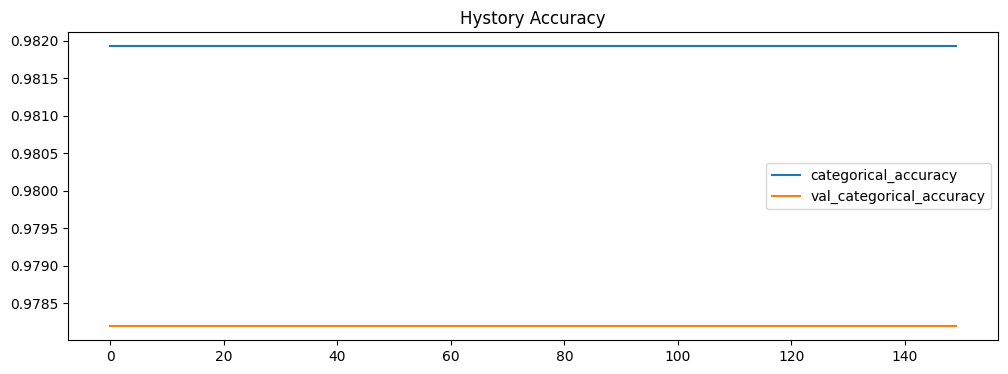

In [36]:
df_hystory = pd.DataFrame(hystory.history)
df_hystory[['categorical_accuracy','val_categorical_accuracy']].plot(figsize=(12, 4), title='Hystory Accuracy')

<Axes: title={'center': 'Hystory Loss'}>

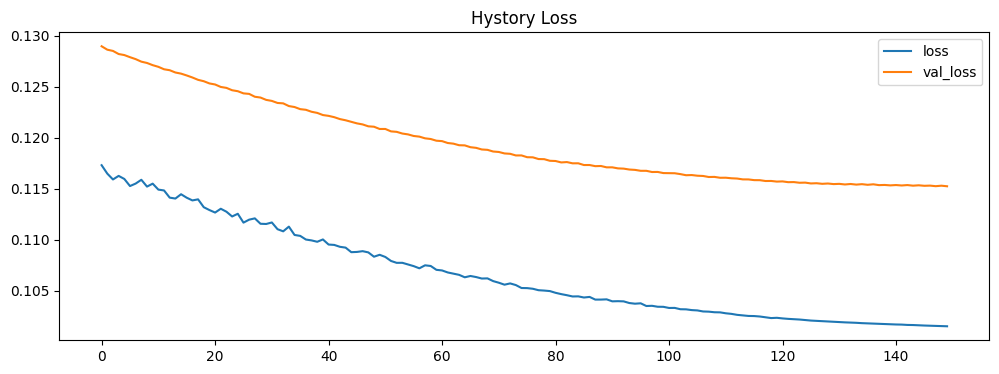

In [37]:
df_hystory[['loss','val_loss']].plot(figsize=(12, 4), title='Hystory Loss')

In [38]:
predictions = model.predict(X_test)
df_predictions = pd.DataFrame(predictions, columns=['NonDemented', "ModerateDemented"])
df_predictions

40/40 [==============================] - 0s 2ms/step


,NonDemented,ModerateDemented
0,0.975487,0.024513
1,0.975487,0.024513
2,0.975487,0.024513
3,0.975487,0.024513
4,0.975487,0.024513
...,...,...
1274,0.975487,0.024513
1275,0.975487,0.024513
1276,0.975487,0.024513
1277,0.975487,0.024513


In [39]:
# convert df_predictions to labels
labels_predictions = []
for i in range(len(df_predictions)):
    labels_predictions.append(df_predictions.iloc[i].idxmax())
labels_predictions = np.array(labels_predictions)
labels_predictions

array(['NonDemented', 'NonDemented', 'NonDemented', ..., 'NonDemented',
       'NonDemented', 'NonDemented'], dtype='<U11')

In [50]:
# compute classification metrics
print(classification_report(df_labels_test.values, labels_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [652, 1279]

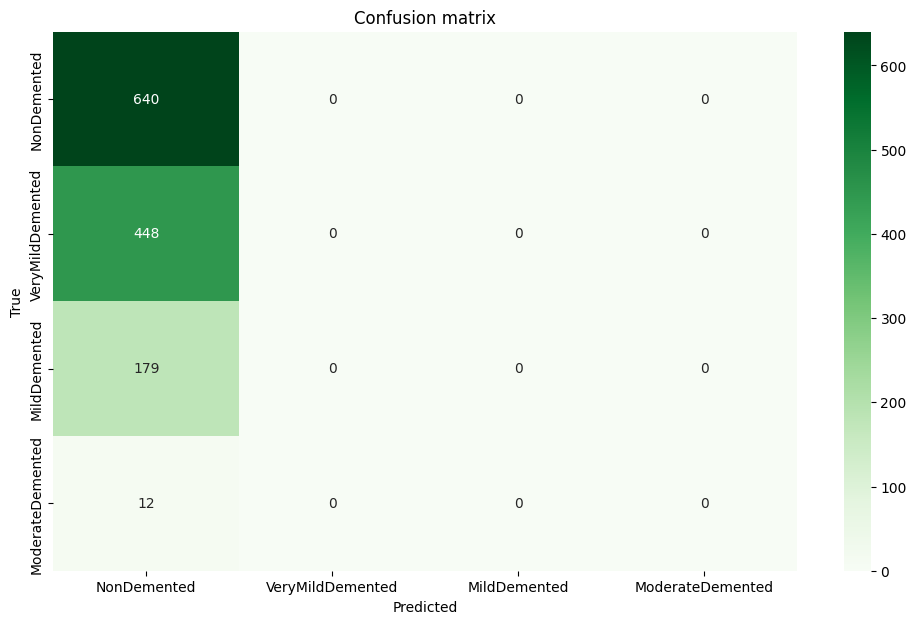

In [52]:
# confusion matrix
cm = confusion_matrix(labels_test, labels_predictions, labels=['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.xticks(np.arange(4) + 0.5, ['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.yticks(np.arange(4) + 0.5, ['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"])
plt.show()